In [3]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import fourier_analysis, compare_homo_hetero, fourier_instability
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import math
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
df_1 = pd.read_csv("Data/data_seed4_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")

In [44]:
def fourier_analysis_(df,  fig_title = "Fourier Analysis", x_lim = None,
                     fig_size = (30,10), save_fig = False, fig_style = 'default'):
    
    """
    Takes an input and returns a plot of the fast fourier transform of the input.
    Note that the valid inputs are: a pandas dataframe.
    Make sure you import pandas as pd and numpy as np.
    """
    
    # check if input is valid, else return exception. 
    if not isinstance(df, (pd.core.frame.DataFrame)):
    
        raise Exception("Invalid input. The valid inputs are: a pandas dataframe. You entered a: " + str(df.__class__))
    
    plt.style.use(fig_style)
    plt.figure(figsize = fig_size)
    
    if isinstance(df, pd.core.frame.DataFrame):
    
        for column in df:
            
            col_fft = scipy.fft.fft(np.array(df[column]))
            n = len(col_fft)
            maxfreq = 1/2
            freq = np.array((range(1, n//2)))
            freq = np.array([x / (n/2) * maxfreq for x in freq])
            period = np.array([1 / x for x in freq])
            col_fft_power =  np.abs(col_fft[0:math.floor(n/2)])**2 
            col_fft_power = col_fft_power[1:]
            max_fft = max(col_fft_power)
            col_fft_power_ = [number / max_fft for number in col_fft_power]
            plt.plot(period, col_fft_power_, label = column)
            plt.scatter(period, col_fft_power_, s = 100)

        plt.legend(loc = 'upper right')
        plt.grid(False)
        plt.xlim(x_lim)
        plt.title(str(fig_title), fontsize=15)
        plt.xlabel("Rounds")
    
    if save_fig:
        plt.savefig("Data/" + str(fig_title) + ".pdf")

In [7]:
df_1.head(10)

,Seed 4
0,0.775
1,0.688
2,0.686
3,0.682
4,0.675
5,0.676
6,0.682
7,0.675
8,0.676
9,0.675


In [46]:
fourier_analysis_(df)

NameError: name 'df' is not defined

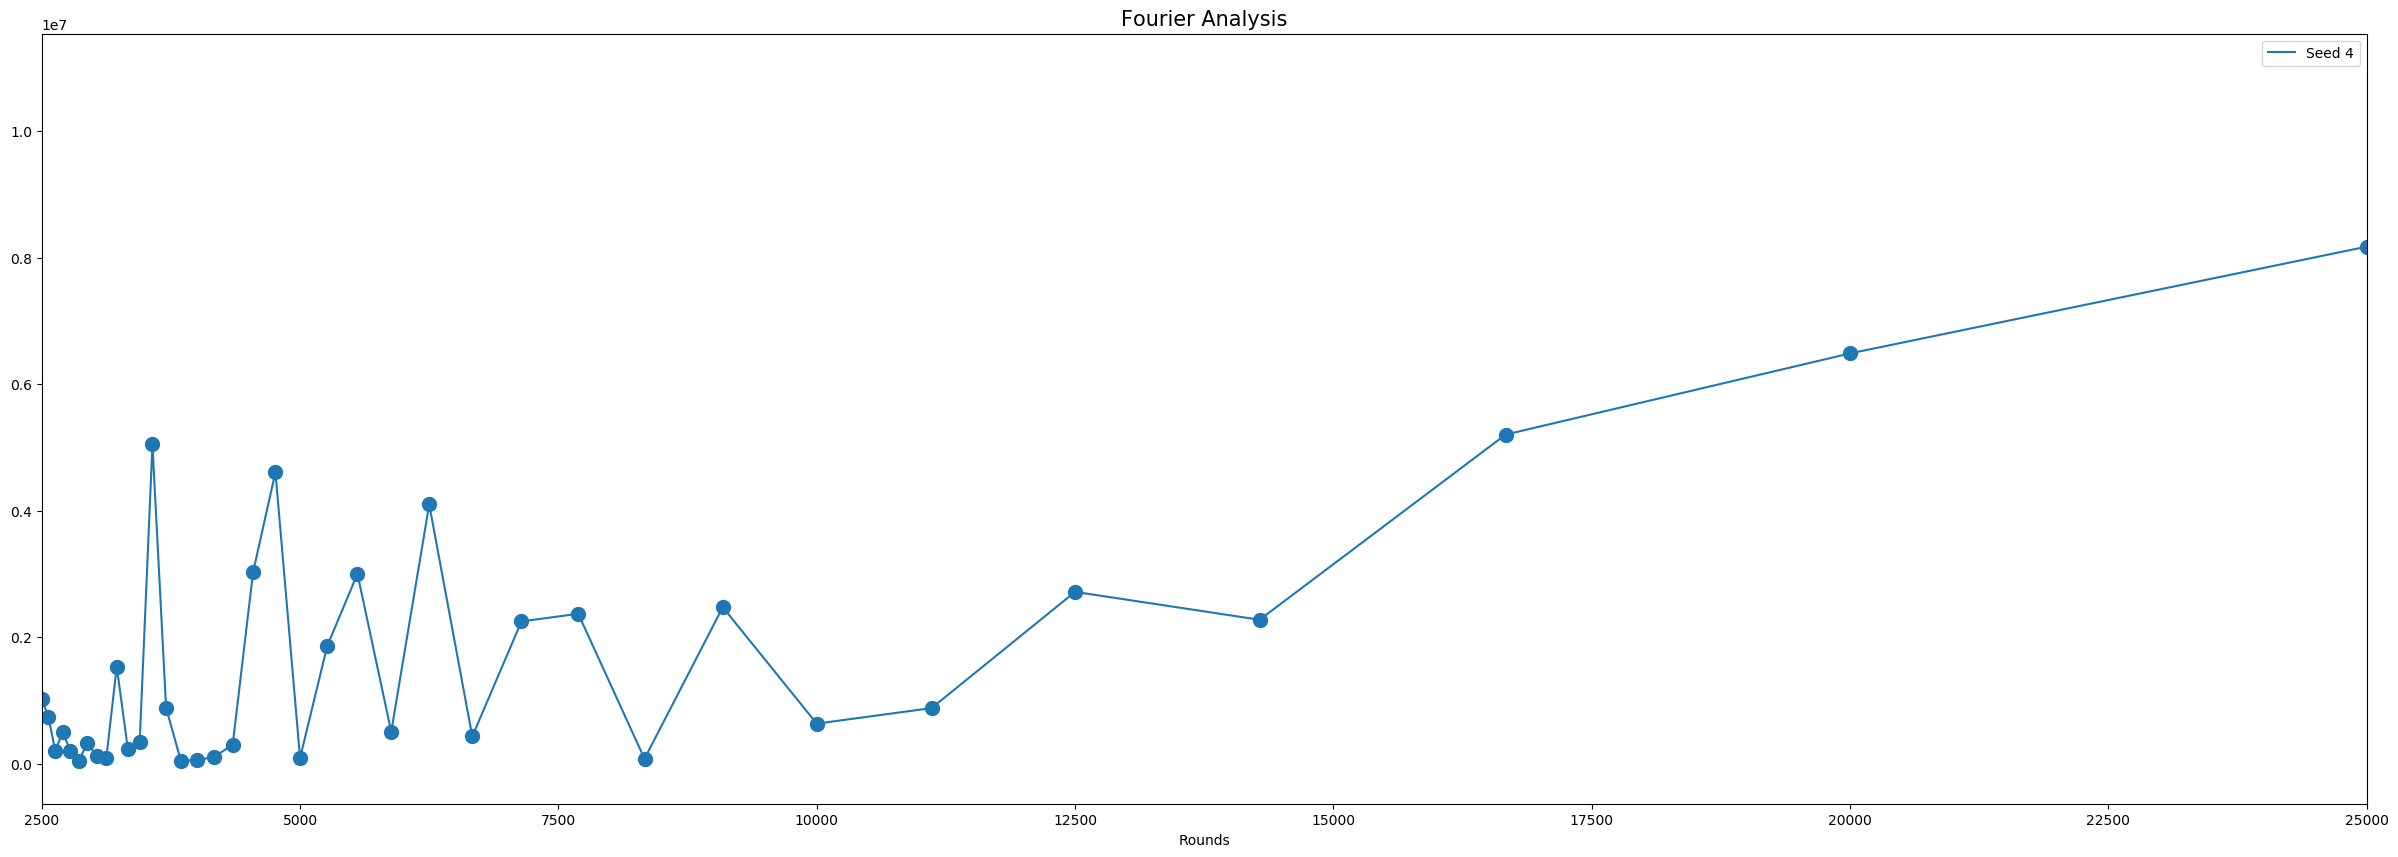

In [7]:
fourier_analysis(df_1, x_lim = (2500,25000))

In [ ]:
fourier_analysis_(df_1)

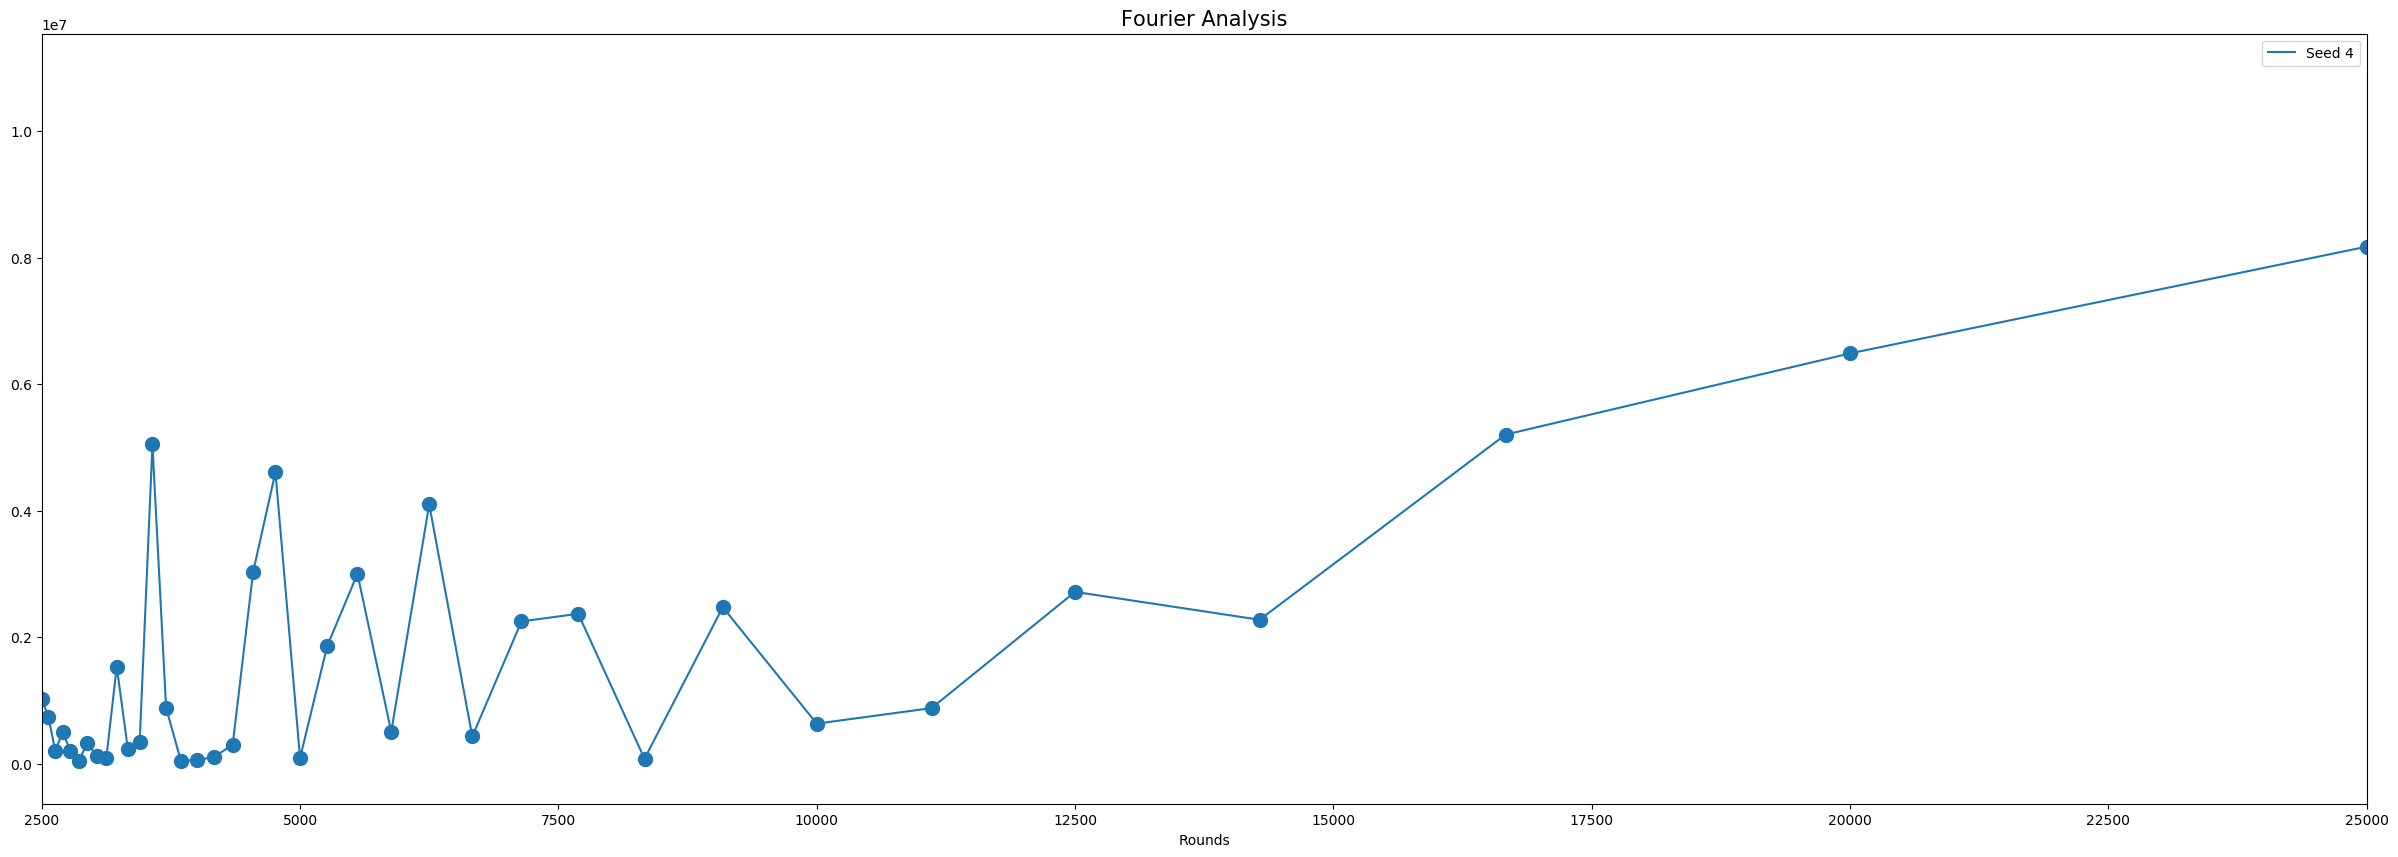

In [9]:
fourier_analysis_(df_1, x_lim = (2500,25000))

In [9]:
col_fft = scipy.fft.fft(np.array(df_1['Seed 4']))
for fourier in range(10):
    print(col_fft[fourier])

(59344.472-0j)
(1166.2853215584043-1913.2113343397991j)
(2014.6363046152192-1159.8387023085024j)
(1701.3926014074805+2831.588641610464j)
(-2388.8917599487554+1571.7760898418173j)
(2495.9565053297188+509.14895133358397j)
(-302.6138397786293-2261.388220571731j)
(111.99366237560486+1504.963278538529j)
(1380.0233623461377+902.2766096516764j)
(-844.6434594733396-408.5883973011863j)


In [10]:
n = len(col_fft)
n

100000

In [11]:
freq = np.array((range(1, n//2)))
freq

array([    1,     2,     3, ..., 49997, 49998, 49999])

In [12]:
maxfreq = 1/2
freq_ = np.array([x / (n/2) * maxfreq for x in freq])
for f in range(10):
    print(freq_[f])

1e-05
2e-05
3e-05
4e-05
5e-05
6e-05
7e-05
8e-05
9e-05
0.0001


In [13]:
period = np.array([1 / x for x in freq_])
for p in range(10):
    print(period[p])

99999.99999999999
49999.99999999999
33333.333333333336
24999.999999999996
20000.0
16666.666666666668
14285.714285714286
12499.999999999998
11111.111111111111
10000.0


In [23]:
col_fft_power =  np.abs(col_fft[0:math.floor(n/2)])**2
col_fft_power = col_fft_power[1:]

In [24]:
col_fft_power[0]

5020599.061128866

In [21]:
max(col_fft_power)

3521766356.958784

In [18]:
len(col_fft_power)

49999

In [36]:
col_fft_power[3] / max(col_fft_power)

0.7493411902955537

In [38]:
max_column = max(col_fft_power)

In [39]:
max_column

10912631.019421509

In [43]:
col_fft_power_ = [number / max_column for number in col_fft_power]

In [41]:
col_fft_power_

[0.46007228249480514,
 0.4952046161579839,
 1.0,
 0.7493411902955537,
 0.594634925307483,
 0.47701162175298156,
 0.20869917127304002,
 0.2491211840762648,
 0.08067413353144899,
 0.0582110323789137]

In [28]:
col_fft_power_

[0.46007228249480514,
 0.4952046161579839,
 1.0,
 0.7493411902955537,
 0.594634925307483,
 0.47701162175298156,
 0.20869917127304002,
 0.2491211840762648,
 0.08067413353144899,
 0.0582110323789137,
 0.22684366390034175,
 0.007287478661383487,
 0.21732979605876085,
 0.20634157739297984,
 0.03957325343665409,
 0.37584689179657504,
 0.04644910384028769,
 0.27523100969251496,
 0.17081130149765972,
 0.008390237461720618,
 0.4225976521632877,
 0.27774178003868777,
 0.027370578550780136,
 0.009965230924807484,
 0.0051366662331519325,
 0.004665113997626317,
 0.08098366619181344,
 0.46270940875458755,
 0.032235910637864136,
 0.021820442550116358,
 0.14093740650472958,
 0.007750155151051805,
 0.011620558970514994,
 0.030199831683908503,
 0.00382483199867057,
 0.018234358279870497,
 0.04644340328363266,
 0.01830974221771231,
 0.06839047844822689,
 0.09360818904911383,
 0.08988043423644859,
 0.046959987712783056,
 0.001985346736592897,
 0.09192815579524838,
 0.0733001541319174,
 0.0113632033985695

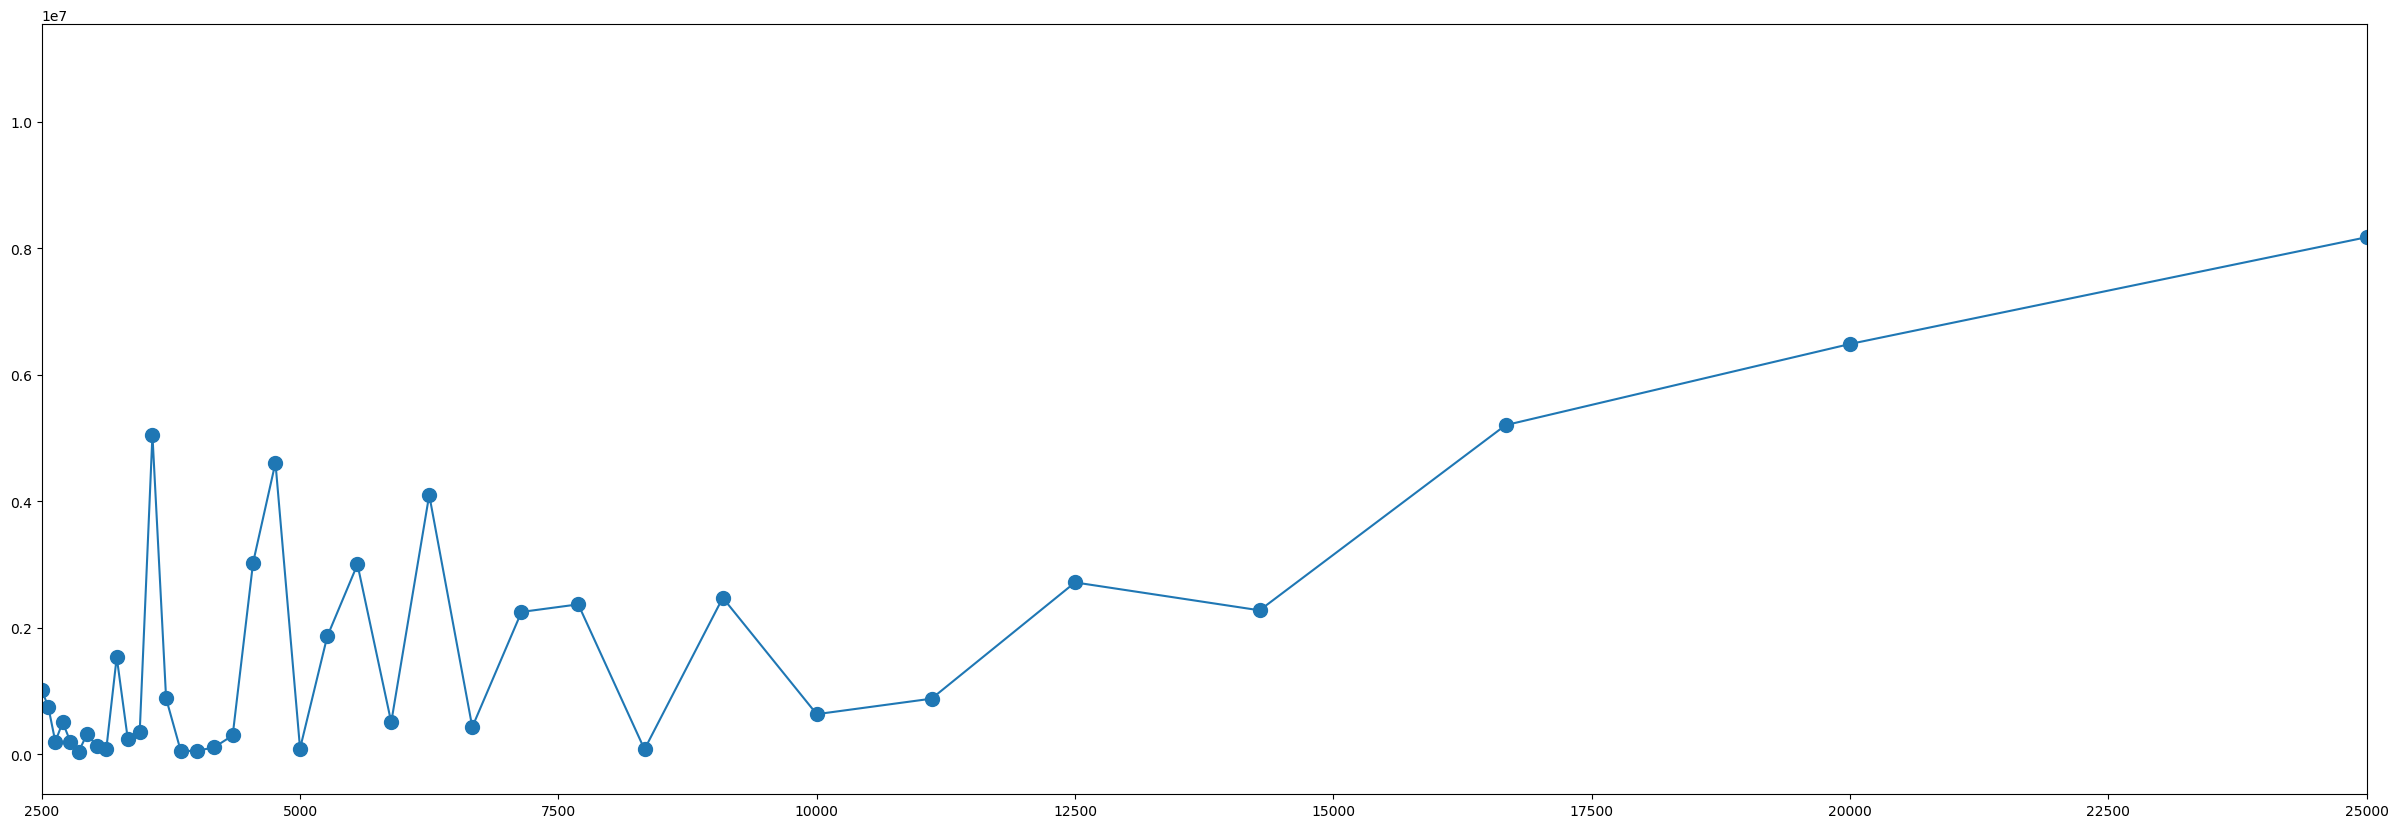

In [21]:
plt.figure(figsize = (30,10))
plt.xlim((2500,25000))
plt.plot(period, col_fft_power[1:])
plt.scatter(period, col_fft_power[1:], s = 100)
plt.show()

In [10]:
fourier_instability([df_1[column] for column in df_1],np.arange(0,10))

,Seed,N,sum_of_peaks
0,Seed 4,0,0.0
1,Seed 4,1,32709136.0
2,Seed 4,2,65154294.0
3,Seed 4,3,96387005.0
4,Seed 4,4,237769562.0
5,Seed 4,5,334614259.0
6,Seed 4,6,400237914.0
7,Seed 4,7,466917572.0
8,Seed 4,8,520980472.0
9,Seed 4,9,656856266.0


In [11]:
def fourier_instability_(dataframe, n_peaks):
    """
    This functions takes as input a dataframe with the average cooperation
    ratio and an integer. The functions calculates the i'th highest peaks
    of the fourier and returns their sum. The results are stored in a dataframe.
    """


    if not isinstance(n_peaks, (list, np.ndarray)):
        raise Exception("Please specify n in a list")
    
    names_df = list()
    numbers_df = list()
    results_df = list()

    for d in dataframe:
        
        col_fft = scipy.fft.fft(np.array(d))
        n = len(col_fft)
        maxfreq = 1/2
        freq = np.array((range(1, n//2)))
        freq = np.array([x / (n/2) * maxfreq for x in freq])
        period = np.array([1 / x for x in freq])
        col_fft_power =  np.abs(col_fft[0:math.floor(n/2)])**2 
        lines_check = [list(i) for i in zip(period, col_fft_power[1:])]

        X = list()
        Y = list()
        Alpha = list()
        result_ins = list()

        for line in lines_check[3:100]:
            alpha = 100000 / line[0] * line[1]
            X.append(round(line[0]))
            Y.append(round(line[1]))
            Alpha.append(round(alpha))

        data = {'X' : X, 'Y' : Y, 'Alpha' : Alpha}
        df = pd.DataFrame(data= data)
        df = df.sort_values(by=['Y'], ascending= False)
        
        for number in n_peaks:
            res = sum(df['Alpha'][0:number])
            names_df.append(str(d.name))
            numbers_df.append(number)
            results_df.append(res)

    df_fin = pd.DataFrame({'Seed':names_df, 'N': numbers_df, 'sum_of_peaks': results_df})


    return df_fin

In [26]:
# NEW CODE
fourier_instability_(dataframe = [df_1[column] for column in df_1], n_peaks =  np.arange(0,10))

,Seed,N,sum_of_peaks
0,Seed 4,0,0.0
1,Seed 4,1,32709136.0
2,Seed 4,2,65154294.0
3,Seed 4,3,96387005.0
4,Seed 4,4,237769562.0
5,Seed 4,5,334614259.0
6,Seed 4,6,400237914.0
7,Seed 4,7,466917572.0
8,Seed 4,8,520980472.0
9,Seed 4,9,656856266.0


In [12]:
#store results
names_df = list()
numbers_df = list()
results_df = list()

In [13]:
col_fft = scipy.fft.fft(np.array(df_1['Seed 4']))
n = len(col_fft)
maxfreq = 1/2
freq = np.array((range(1, n//2)))
freq = np.array([x / (n/2) * maxfreq for x in freq])
period = np.array([1 / x for x in freq])
col_fft_power =  np.abs(col_fft[0:math.floor(n/2)])**2 
print(col_fft_power[0])
lines_check = [list(i) for i in zip(period, col_fft_power[1:])]

X = list()
Y = list()
Alpha = list()
result_ins = list()

3521766356.958784


In [14]:
lines_check[3]

[24999.999999999996, 8177283.917349495]

In [15]:
for line in lines_check[3:10]:
    print(line[0],line[1])

24999.999999999996 8177283.917349495
20000.0 6489031.531141831
16666.666666666668 5205451.820166146
14285.714285714286 2277457.050161739
12499.999999999998 2718567.5609456627
11111.111111111111 880367.052040243
10000.0 635235.5176106835


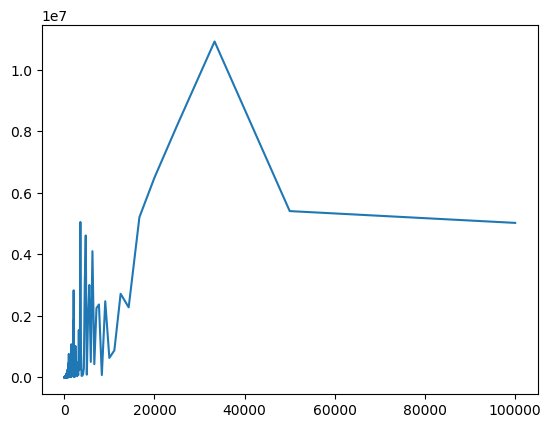

In [16]:
plt.plot([line[0] for line in lines_check], [line[1] for line in lines_check])

In [17]:
for line in lines_check[3:100]:
    alpha = 100000 / line[0] * line[1]
    X.append(round(line[0]))
    Y.append(round(line[1]))
    Alpha.append(round(alpha))

data = {'X' : X, 'Y' : Y, 'Alpha' : Alpha}
df = pd.DataFrame(data= data)
df = df.sort_values(by=['Y'], ascending= False)
df

,X,Y,Alpha
0,25000.0,8177284.0,32709136.0
1,20000.0,6489032.0,32445158.0
2,16667.0,5205452.0,31232711.0
24,3571.0,5049377.0,141382557.0
17,4762.0,4611652.0,96844697.0
...,...,...,...
69,1370.0,19589.0,1429987.0
76,1250.0,18333.0,1466647.0
43,2128.0,16530.0,776899.0
65,1449.0,12602.0,869518.0


In [18]:
100000 / 25000.0 * 8177284.0

32709136.0

In [19]:
32709136.0 + 32445158.0 + 31232711.0

96387005.0

In [31]:
n_peaks =  np.arange(0,10)
for number in n_peaks:
    res = sum(df['Alpha'][0:number])
    names_df.append(str(df_1['Seed 4'].name))
    numbers_df.append(number)
    results_df.append(res)

df_fin = pd.DataFrame({'Seed':names_df, 'N': numbers_df, 'sum_of_peaks': results_df})

In [32]:
df_fin

,Seed,N,sum_of_peaks
0,Seed 4,0,0.0
1,Seed 4,1,32709136.0
2,Seed 4,2,65154294.0
3,Seed 4,3,96387005.0
4,Seed 4,4,237769562.0
5,Seed 4,5,334614259.0
6,Seed 4,6,400237914.0
7,Seed 4,7,466917572.0
8,Seed 4,8,520980472.0
9,Seed 4,9,656856266.0
